# Netflix Movie length analysis: Datacamp Project01

## Task

![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Contents

- import libraries
- Read Dataframe
- Data Preprocessing
    - check for missing values
    - Data Filtering
- Understanding Data
- Basic Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

## Read Dataframe

In [2]:
netflix_df = pd.read_csv('netflix_data.csv', parse_dates=['date_added'])
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas


## Getting Movie Type
As we need to analysis only the Movie type. 

In [3]:
mov = netflix_df[netflix_df['type'] == 'Movie']

In [4]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5377 non-null   object        
 1   type          5377 non-null   object        
 2   title         5377 non-null   object        
 3   director      5214 non-null   object        
 4   cast          4951 non-null   object        
 5   country       5147 non-null   object        
 6   date_added    5377 non-null   datetime64[ns]
 7   release_year  5377 non-null   int64         
 8   duration      5377 non-null   int64         
 9   description   5377 non-null   object        
 10  genre         5377 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 504.1+ KB


In [5]:
mov.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [6]:
mov.shape

(5377, 11)

## Data Preprocessing

### Checking for missing values
Director, cast, country have missing values. <br>
 Among these 3, Country and Date_added are comparatively more relevant to the analysis.

In [7]:
mov.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added      False
release_year    False
duration        False
description     False
genre           False
dtype: bool

<AxesSubplot: >

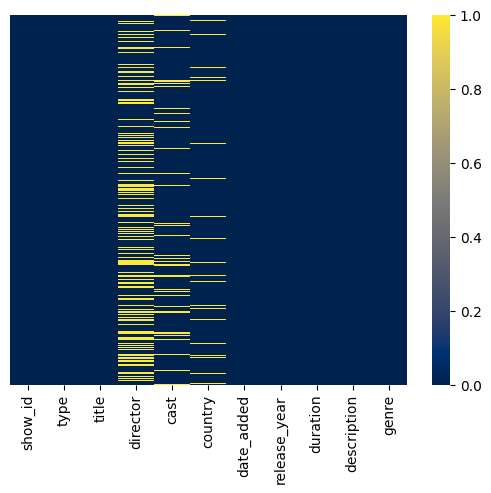

In [8]:
sns.heatmap(netflix_df.isna(), yticklabels=False, cmap='cividis')

In [9]:
mov.isna().sum()

show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
duration          0
description       0
genre             0
dtype: int64

### handling missing values
- 5% approach
- drop if not important (Cast information not necessarily have a correlation with the duration)

In [10]:
threshold = len(mov) * .05
cols_to_drop = mov.columns[mov.isna().sum() <= threshold]
print(threshold, cols_to_drop)

268.85 Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')


In [11]:
mov.dropna(subset=cols_to_drop, inplace=True)

h:\installed_softwares\anaconda_setup\envs\tf\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
mov.shape

(5024, 11)

In [13]:
mov.isna().sum()

show_id           0
type              0
title             0
director          0
cast            347
country           0
date_added        0
release_year      0
duration          0
description       0
genre             0
dtype: int64

In [14]:
mov['cast'].describe() 

count            4677
unique           4563
top       Samuel West
freq               10
Name: cast, dtype: object

not affecting the duration of movie as there are 4563 different cast type here. almost unique casting for each movie. :3 dropna from cast.

In [15]:
mov.dropna(subset=['cast'], inplace=True)

In [16]:
mov.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [17]:
mov.shape

(4677, 11)

Now dataframe has no missing values and ready for use. Next comes filtering irrelevant columns that we won't consider for this time.

### Data Filtering
dropping show_id, director, cast, description as they have little effect on the duration of the movie. Also remove type as now there is only 1 type: Movie

In [18]:
mov.drop(columns=['show_id', 'director', 'cast', 'description', 'type'], inplace=True)

h:\installed_softwares\anaconda_setup\envs\tf\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
mov.head()

,title,country,date_added,release_year,duration,genre
1,7:19,Mexico,2016-12-23,2016,93,Dramas
2,23:59,Singapore,2018-12-20,2011,78,Horror Movies
3,9,United States,2017-11-16,2009,80,Action
4,21,United States,2020-01-01,2008,123,Dramas
6,122,Egypt,2020-06-01,2019,95,Horror Movies


## Understanding Data

In [20]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 1 to 7783
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         4677 non-null   object        
 1   country       4677 non-null   object        
 2   date_added    4677 non-null   datetime64[ns]
 3   release_year  4677 non-null   int64         
 4   duration      4677 non-null   int64         
 5   genre         4677 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 255.8+ KB


### Nunique

In [21]:
for x in mov.columns:
    print(x, mov[x].nunique())

title 4677
country 72
date_added 1274
release_year 71
duration 186
genre 18


### Country & Genre Description

In [22]:
mov['country'].describe()

count              4677
unique               72
top       United States
freq               1856
Name: country, dtype: object

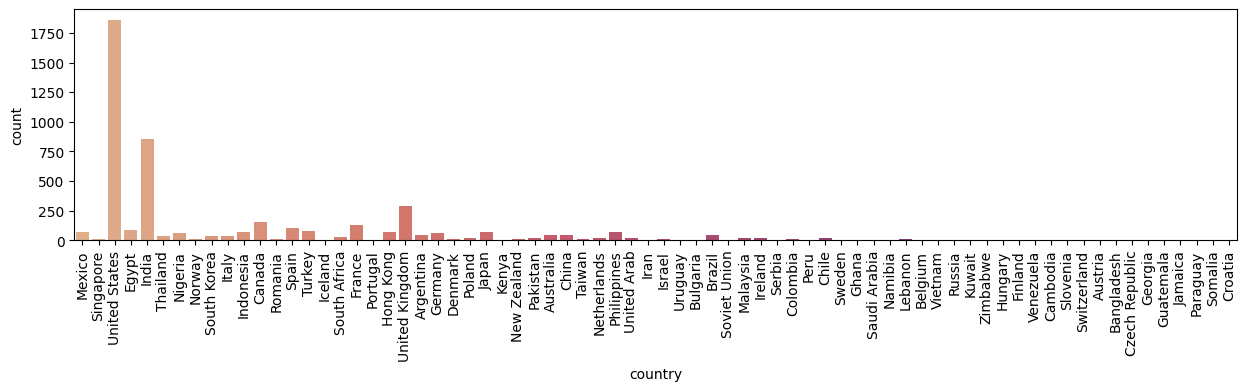

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches((15, 3))
sns.countplot(data=mov, x="country", palette="flare")
plt.xticks(rotation=90);

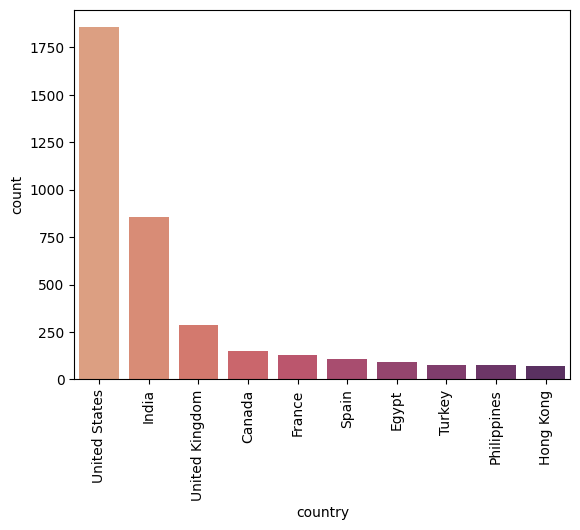

In [24]:

countries = mov['country'].value_counts().head(10).index
sns.countplot(
    data=mov[mov["country"].isin(countries)],
    x="country",
    palette="flare",
    order=mov[mov["country"].isin(countries)]['country'].value_counts().sort_values(ascending=False).index,
)
plt.xticks(rotation=90);

Top 5 countries with netflix movies are: USA, IND, UK, CAN, FRN

In [25]:
mov["genre"].describe()

count       4677
unique        18
top       Dramas
freq        1343
Name: genre, dtype: object

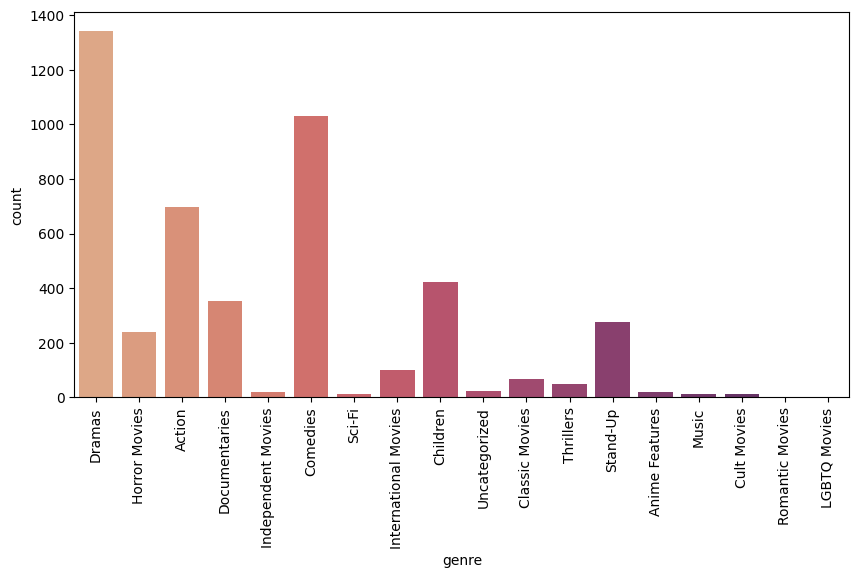

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches((10,5))
sns.countplot(data=mov, x='genre', palette='flare')
plt.xticks(rotation=90);


Dramas is most released movie genre followed by comedies and action. 

### Release Year & Date_added

In [27]:
print(mov["date_added"].min(), mov["date_added"].max())

2008-01-01 00:00:00 2021-01-16 00:00:00


In [28]:
print(mov["release_year"].min(), mov["release_year"].max())

1942 2021


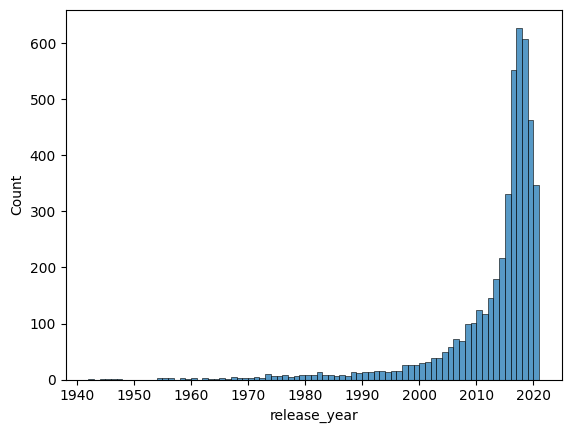

In [29]:
sns.histplot(data=mov, x="release_year", binwidth=1);

So, maximum movie released was in 2018 > 2019 > 2017 > 2020 > 2016 

### target feature: duration

In [31]:
mov['duration'].describe()

count    4677.000000
mean      102.384648
std        26.428435
min         8.000000
25%        89.000000
50%       100.000000
75%       117.000000
max       253.000000
Name: duration, dtype: float64

#### distribution

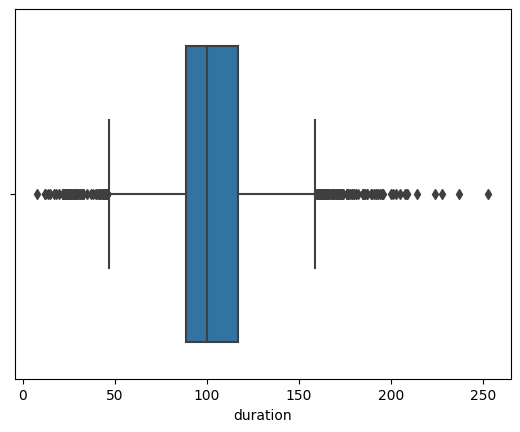

In [33]:
sns.boxplot(data=mov, x='duration');

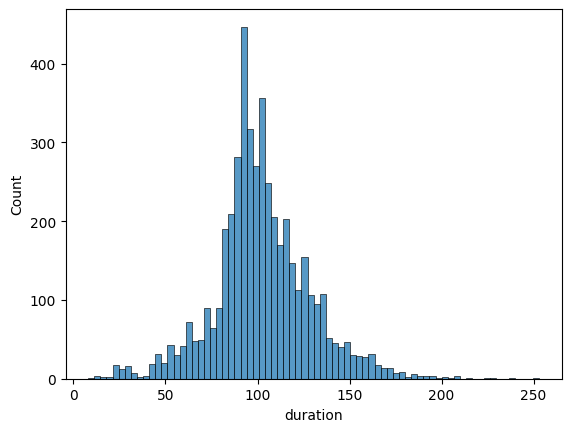

In [30]:
sns.histplot(data=mov, x='duration');

#### distribution without outliers

In [34]:
IQR = mov["duration"].quantile(0.75) - mov["duration"].quantile(0.25)

lower_limit = mov["duration"].quantile(0.25) - (1.5 * IQR)
upper_limit = mov["duration"].quantile(0.75) + (1.5 * IQR)

print(lower_limit, upper_limit)

47.0 159.0


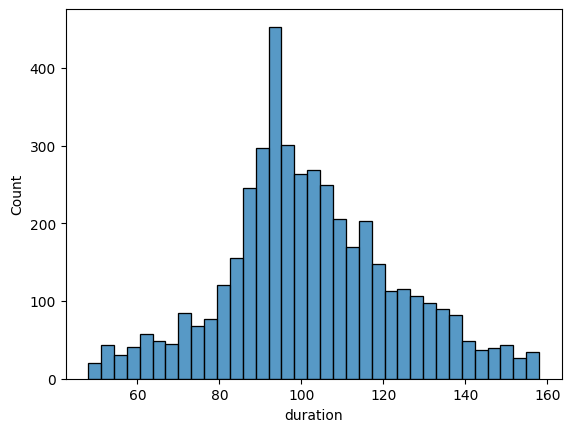

In [35]:
sns.histplot(data=mov[(mov["duration"] > lower_limit) & (mov["duration"] < upper_limit)], x="duration");

## Basic Analysis

### duration 

### duration vs release_year


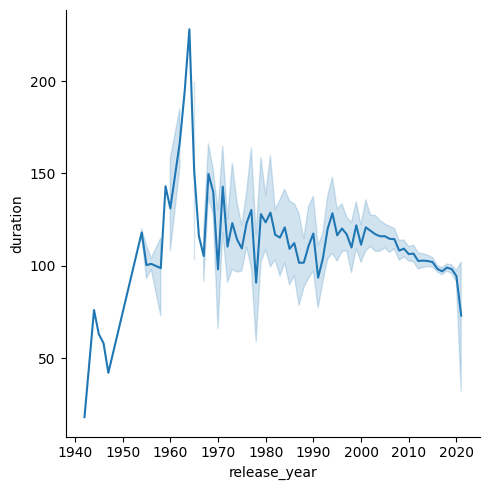

In [134]:
sns.relplot(data=mov, x="release_year", y="duration", kind="line");

duration vs particular genre

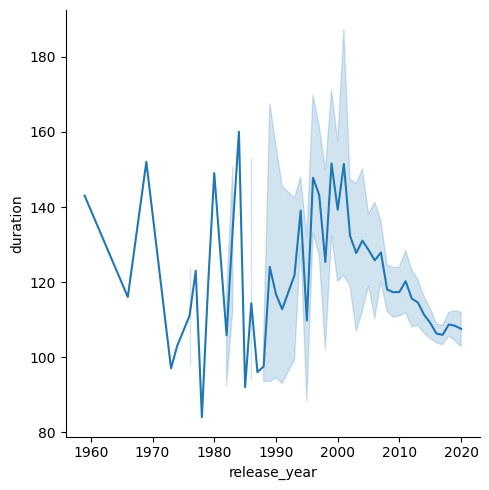

In [135]:
sns.relplot(data=mov[mov['genre'] == 'Dramas'], x="release_year", y="duration", kind="line");

In [136]:
# sns.FacetGrid()

TypeError: __init__() missing 1 required positional argument: 'data'